✍ Иногда можно столкнуться с отсутствием данных, например когда вы обрабатываете показания счётчика потребления горячей и холодной воды, а он по какой-то причине не работал несколько дней. Пропуски могут быть заполнены значениями NaN или нулями.

Взгляните на график ниже: за два дня (конец декабря и начало января) данные отсутствуют (они равны нулю) — из-за этого образуются спады до 0 в районе января.

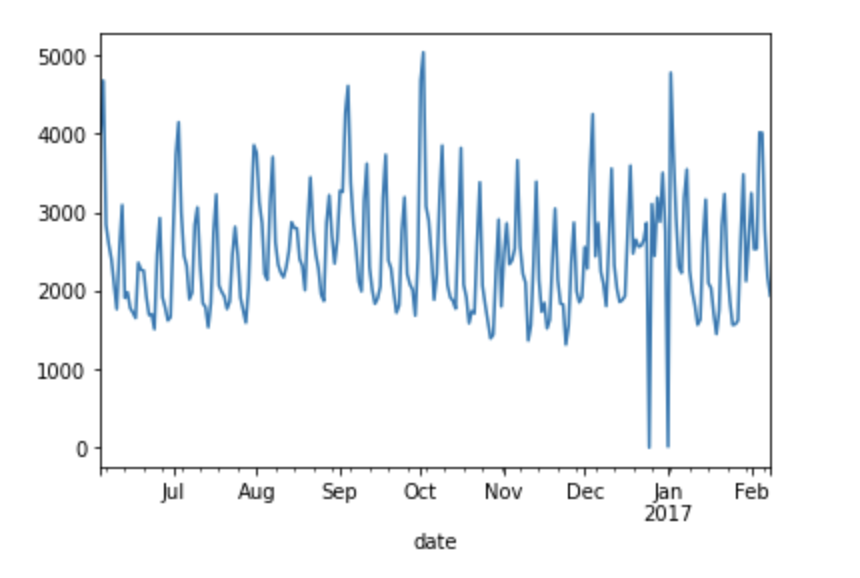

Хотим ли мы, чтобы модель, которая должна предсказывать объём потребления воды, учитывала эти значения, равные нулю? Очевидно, нет. Значит, нам нужно каким-то образом заполнить пропуски, причём заполнение нулями нам не подходит, а заполнение средним — тоже не самая эффективная идея.

А что, если у нас есть показания счётчика по дням, а заказчик хочет получить прогноз по часам? Тогда нам снова нужно как-то заполнить возникающие пропуски для часов.



###  Знакомьтесь — перед нами проблемы upsampling и downsampling на временных рядах.

## **Upsampling** — это увеличение частоты выборки (повышение частоты дискретизации), например с минут до секунд. Также upsampling применяют для заполнения пропусков неизвестных значений. Для этой цели мы будем использовать **интерполяцию**.

## **Downsampling** — это уменьшение частоты выборки, например с дней до месяцев.

# DOWNSAMPLING

По своей сути, downsampling — это перегруппировка. Мы можем сгруппировать значения, полученные по дням, в значения, полученные за месяц, путём использования метода groupby(). Однако существует ещё один встроенный в DataFrame метод с чуть более широким функционалом — resample(). Этот метод позволяет делать нестандартные группировки, такие как «за три дня» или «за каждые шесть секунд», то есть вы можете выбрать свой интервал группировки и получить результат, написав одну строку кода. Вызывать метод resample необходимо у датафрейма, в качестве индекса у которого используются даты в формате datetime. Например, если наш временной ряд с показаниями счетчика по потреблению воды изначально сгруппирован по дням, применив к нему resample, можно получить:

+ общие количества за каждые три месяца (.resample("3M").sum())

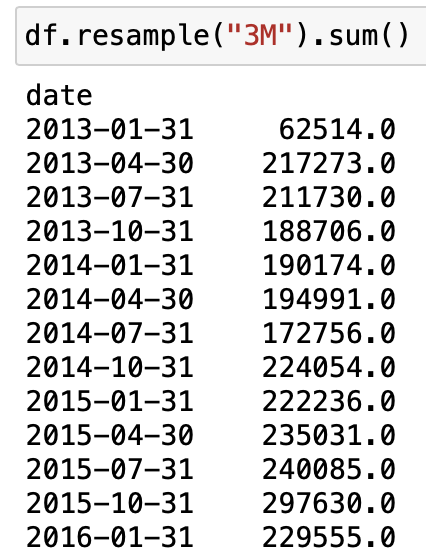

+ средние значения за каждые 20 часов (.resample("20h").mean())

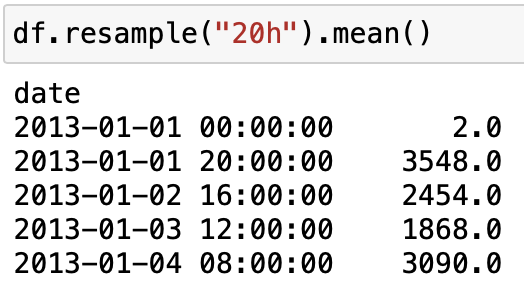

+ максимальные значения за каждый квартал (.resample("Q").max())

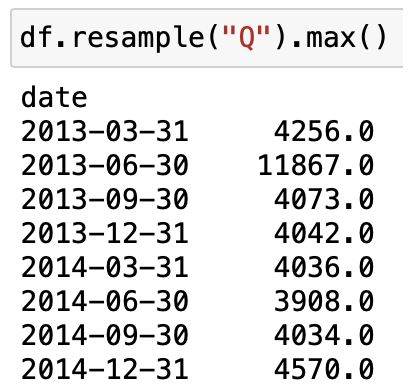

Дальше уже можно работать над построением модели.

Правила группировки (Q, H, M и др.) — это сокращения, используемые в работе с типом данных Timestamp. Полный перечень правил группировки можно найти в документации (таблица Date Offset).

Теперь пора переходить к upsampling. Но прежде рассмотрим понятие, которое мы уже упоминали выше, — «интерполяция».

# ИНТЕРПОЛЯЦИЯ

## Говоря простым языком, **интерполяция** — это нахождение некоторых промежуточных значений по функции, описывающей поведение данных. То есть если мы найдём такую функцию, значения которой будут совпадать с уже известными нам значениями, то можно предположить, что она поможет верно или приблизительно восстановить для нас неизвестные значения.

Существуют несколько способов нахождения этой функции, и интерполяция может быть выполнена с помощью:

+ линейной функции,
+ многочлена Лагранжа,
+ интерполяционной формулы Ньютона,
+ семейства сплайн-функций.

# UPSAMPLING

Для реализации upsampling на практике мы будем использовать уже известный нам метод resample, чтобы декомпозировать данные, например от дня к часам, а затем воспользуемся встроенным методом interpolate(), который принимает в качестве аргумента указание метода интерполяции: 'linear', 'nearest', 'spline', 'barycentric', 'polynomial' и другие. То есть сначала мы применяем к данным resample() с параметром h (час), а затем вместо агрегирующей функции sum/mean и др. применяем interpolate('linear'), чтобы выполнить линейную интерполяцию.

Пример результата выполнения функции — ниже. Мы можем применить её к одному из ранее использованных в модуле временных рядов.

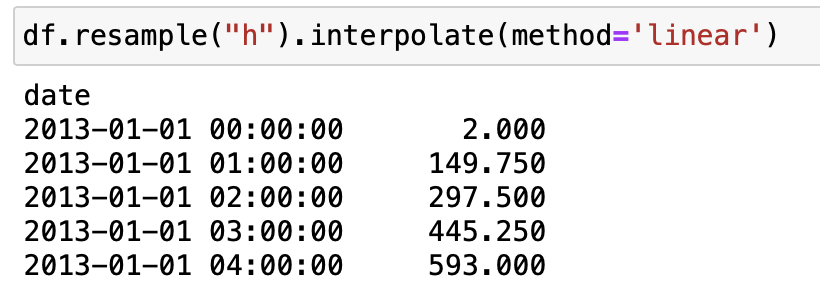

В следующем юните вы попробуете осуществить декомпозицию upsampling и downsampling на практике, но прежде давайте закрепим полученные знания с помощью небольшого теста ↓

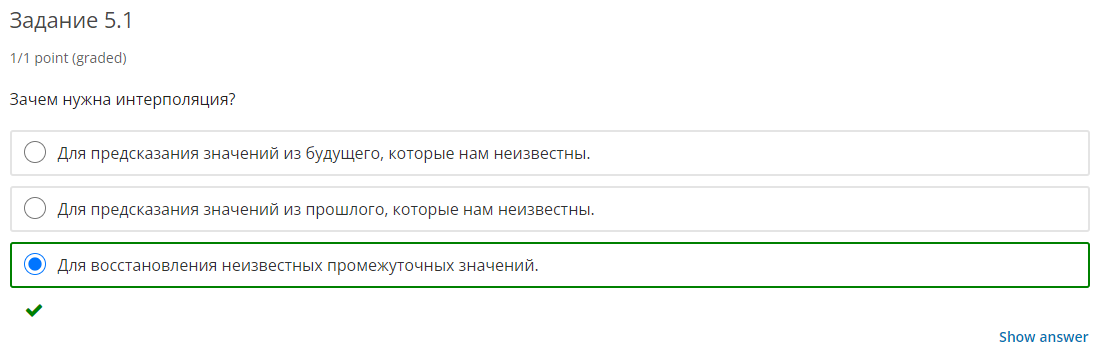

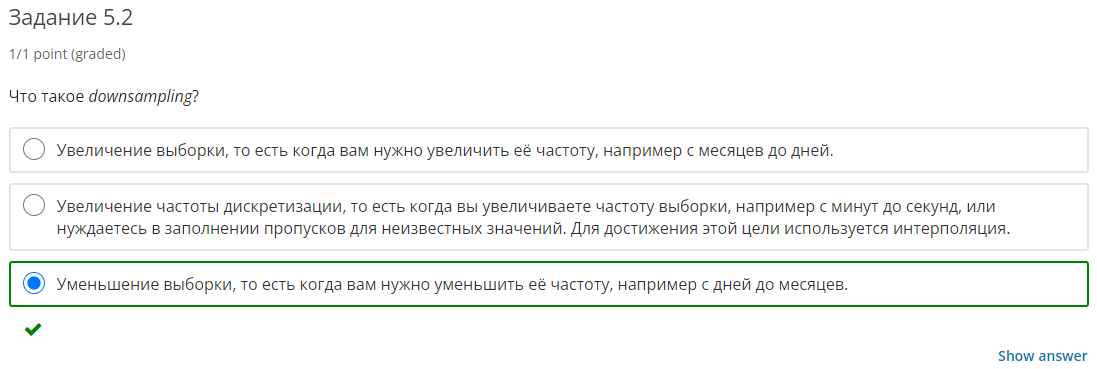

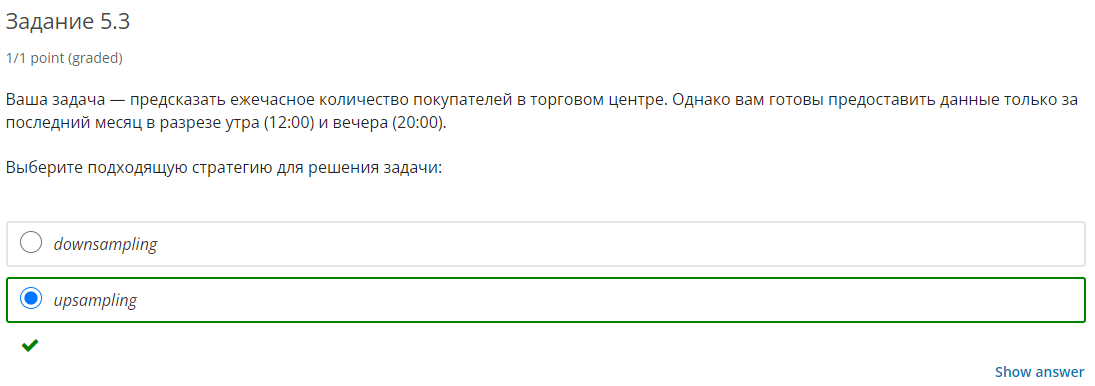

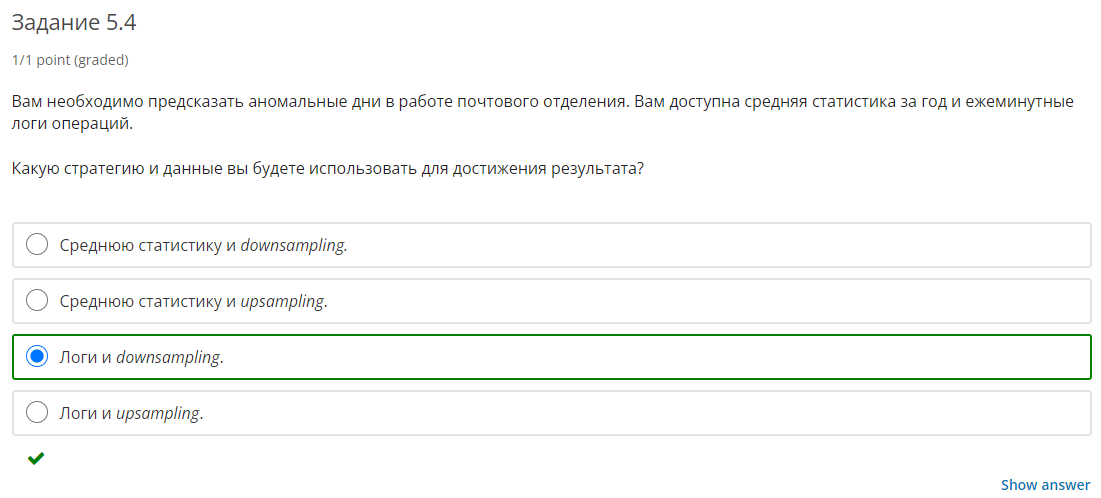